<a href="https://colab.research.google.com/github/MuhammedAshraf2020/Paper2Code/blob/main/02%20-%20VggNet/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d puneet6060/intel-image-classification

 97% 337M/346M [00:02<00:00, 157MB/s]
100% 346M/346M [00:02<00:00, 144MB/s]


In [ ]:
!unzip /content/intel-image-classification.zip

In [4]:
path = "/content/seg_train/seg_train"

In [5]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch , os
import matplotlib.pyplot as plt

In [6]:
names = ['buildings', 'forest',  'glacier',  'mountain' , 'sea',  'street' ]

In [7]:
transform = transforms.Compose([transforms.ToTensor() , transforms.Resize((400 , 400)) ])

In [8]:
dataset = torchvision.datasets.ImageFolder(path , transform = transform)

In [9]:
dataloader = DataLoader(dataset , batch_size = 16 , shuffle = True)

In [10]:
sample = next(iter(dataloader))

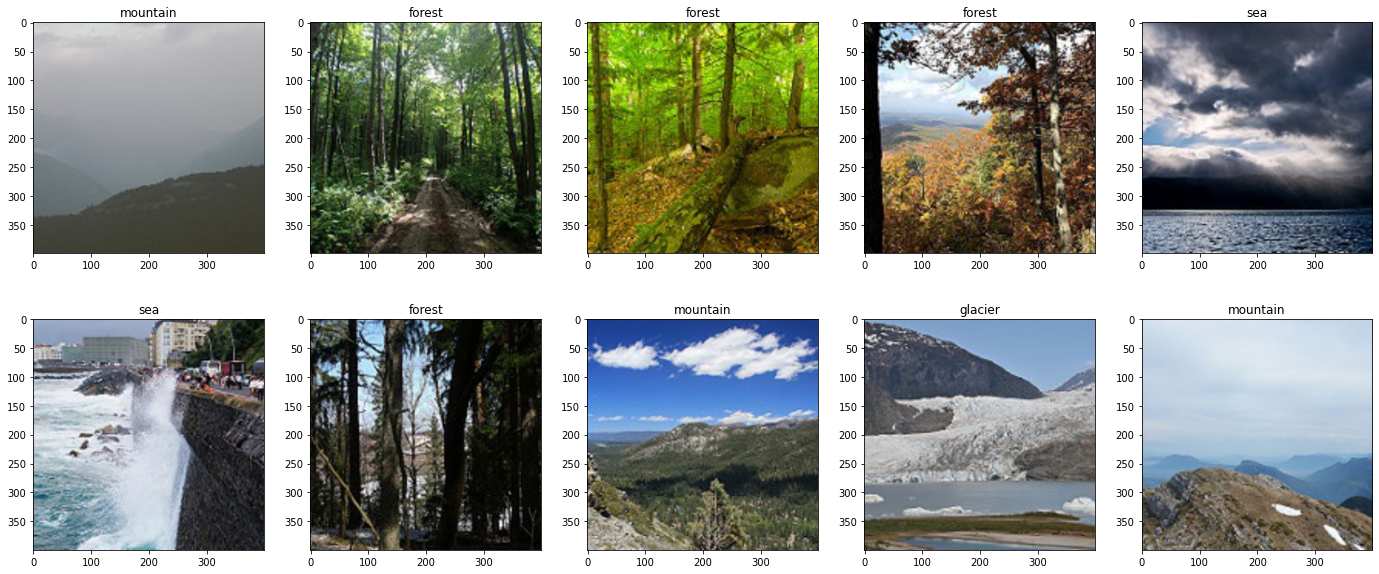

In [11]:
sub = plt.figure(figsize = (24 , 10))
rows = 2
cols = 5
for index in range (1 , rows * cols + 1):
  # extract img , label
  img = sample[0][index]
  lbl = sample[1][index]
  sub.add_subplot(rows , cols , index)
  plt.imshow(img.detach().permute(1 , 2 , 0))
  plt.title(names[lbl.item()])
plt.show()

In [ ]:
pip install pytorch-lightning

In [7]:
!wandb login --relogin

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
!python train.py --model_num=E